## Assignment 3: Timing code execution

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Question 1.

The `%timeit` magic command can be used to get basic execution timing information.

Explore its workings executing the Python commands below.

Hay muchas formas de medir tiempo en programas, pero en notebooks se usa el %timeit que da mucha informacion básica sobre cuanto tardan en ejecutarse las cosas.
Si nuestro programa es muy largo, timit no va a funcionar.

In [ ]:
timings = %timeit -n 1000 -r 10 -o [k**2 for k in range(10)] # vamos a repetir 10 veces un loop en el que 
# 1000 veces se va a ejecutar el codigo python que aparece en la list comprehension, -o es el output
# indicamos que guardamos la salida en el objeto timings. El código que tenemos que ejecutar no tiene porq
# ser simple, podemos llamar algo complicado, pero no podemos llamar a 3 cosas complicadas por ej

print(dir(timings)[-9 : ], '\n')
print("all_runs", np.array(timings.all_runs).round(3))
print("repeat", timings.repeat)
print("loops", timings.loops) # tiempo q tardan los loops
print("compile_time", timings.compile_time) # como las cosas se compilan, xq es un lenguaje interpretado
                                            # vemos cuanto tarda en compilar el programa
print("average_time", timings.average)
print("best_time", timings.best)
print("worst_time", timings.worst)

# el tiempo más relevante es el best, porq el ordenador hace muchas cosas a la vez, con lo cual en el average
# no tenemos el tiempo real. Sino que cosas q pasan en el ordenador afectan a esto.
# Para estimar tiempo de ejecucion del algoritmo va mejor el BEST TIME

5.86 μs ± 2.66 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)
['all_runs', 'average', 'best', 'compile_time', 'loops', 'repeat', 'stdev', 'timings', 'worst'] 

all_runs [0.012 0.009 0.008 0.007 0.004 0.004 0.004 0.004 0.004 0.003]
repeat 10
loops 1000
compile_time 0.0003229999999998512
average_time 5.855469499510946e-06
best_time 3.10307900144835e-06
worst_time 1.1512157998367911e-05


### Question 2.

Among our most expensive algorithms is the one for matrix multiplication. 

Use the `%timeit` magic command to measure its execution times for the multiplication of random matrices with sizes between 10 and 20, storing the best execution times in a list with dimension and time pairs that you can then use to further explore them.

In [3]:
def matrix_multiplication(m_1: np.ndarray, m_2: np.ndarray) -> np.ndarray:
    # ndarray> array n dimensional, con las dimensiones q sea...
    """
    Perform matrix multiplication between two 2D numpy arrays.
        Args:
            m_1 (np.ndarray): The first matrix with shape (n_rows, n_interm).
            m_2 (np.ndarray): The second matrix with shape (n_interm, n_columns).
        Returns:
            np.ndarray: The resulting matrix product with shape (n_rows, n_columns).
        Raises:
            ValueError: If the number of columns in the first matrix does not match the number of rows in the second matrix.
    """
    n_rows, n_interm, n_columns = \
        m_1.shape[0], m_2.shape[0], m_2.shape[1]
    
    # Programación defensiva > incorporar el raise ValueError
    # comprobar q m1 y m2 tienen shape 2

    m_product = np.zeros( (n_rows, n_columns) )
    
    for p in range(n_rows):
        for q in range(n_columns):
            for r in range(n_interm):
                m_product[p, q] += m_1[p, r] * m_2[r, q]
                
    return m_product

l_timings = []
for i in range(11): # llegando hasta 10
    dim = 10 + i # de 10 a 20 vamos a generar
    m = np.random.uniform(0., 100, (dim, dim)) # una matriz uniforme con dimension dim dim
    print("\ndim: ", dim)
    timings = %timeit -o -n 10 -r 5 matrix_multiplication(m, m) # repetimos la multiplicacion 10 x 5 veces
    l_timings.append([dim, timings.best])   # en una lista vacía añado la dimension y el best time
    
a_timings = np.array(l_timings)
print(a_timings)


dim:  10
487 µs ± 32.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

dim:  11
695 µs ± 54.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

dim:  12
850 µs ± 24.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

dim:  13
1.13 ms ± 35.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

dim:  14
1.39 ms ± 62.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

dim:  15
1.71 ms ± 52.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

dim:  16
1.96 ms ± 15.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

dim:  17
2.57 ms ± 172 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

dim:  18
3.17 ms ± 51.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

dim:  19
3.94 ms ± 109 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

dim:  20
4.6 ms ± 151 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
[[1.00000000e+01 4.59019979e-04]
 [1.10000000e+01 6.37770002e-04]
 [1.20000000e+01 8.05449998e-04]
 [1.30000000e+01 

### Question 3.

Plot the best times you have got from the previous execution, striving to make your picture as informative as possible.

Which kind of time function you should get? Do you actually get it?

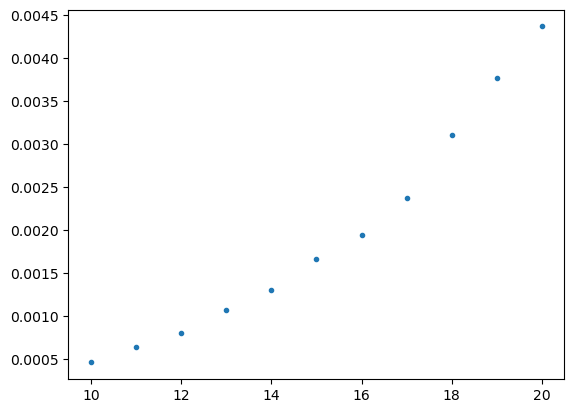

In [4]:
#transform l_timings in a numpy array and normalize the times in an adequate way
plt.plot(a_timings[:, 0], a_timings[:, 1], '.')

# sabemos q ls tiempos incrementan cubicamente, asi que este incremento tiene sentido al respecto

### Question 4.

We are aware that our matrix multiplication function is not going to be very efficient.

In order to ascertain this, repeat the previous experiments but using now Numpy's `dot` method. Try to limit `timeit`'s verbosity.


dim:  10
The slowest run took 239.58 times longer than the fastest. This could mean that an intermediate result is being cached.
48.4 μs ± 139 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)

dim:  15
4.41 μs ± 1.52 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)

dim:  20
4.67 μs ± 1.06 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)

dim:  25
9.89 μs ± 2.54 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)

dim:  30
5.5 μs ± 1.11 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)

dim:  35
The slowest run took 5.86 times longer than the fastest. This could mean that an intermediate result is being cached.
11.9 μs ± 9.5 μs per loop (mean ± std. dev. of 10 runs, 50 loops each)

dim:  40
7.9 μs ± 507 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)

dim:  45
12 μs ± 629 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)

dim:  50
13.3 μs ± 549 ns per loop (mean ± std. dev. of 10 runs, 50 loops each)

dim:  55
21 μs ± 2.7 μs per loop

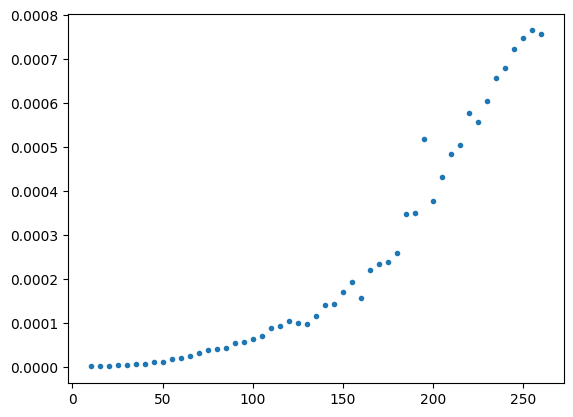

In [3]:
# Hemos visto que nuestra función no es muy eficiente, no hace las cosas bien, y rápido
# porque? OJO EN PYTHON CON LOS BUCLES FOR... Hay que intentar evitarlos cuando se pueda.
# El tipo de bucle for que hems usado en la funcion anterior, que tenemos bucles anidados
# Si hay que hacer loops, es mejor hacerlo sobre listas predefinidas, que no haga falta crearlas.

# Aquí mejoramos esto:

l_timings_np = []
for i in range(51):
    #reproduce your previous code but timing now the numpy multiplication times
    dim = 10 + 5 * i
    #put your code here
    m = np.random.uniform(0., 100, (dim, dim))
    print("\ndim: ", dim)
    timings = %timeit -o -n 50 -r 10 m.dot(m) # multiplicación de numpy >>> m.dot(m)
    l_timings_np.append([dim, timings.best])
    
#put your plot here
a_timings_np  = np.array(l_timings_np )

plt.plot(a_timings_np [:, 0], a_timings_np [:, 1], '.')


# Cuanto menos programemos mejor... si hay que multiplicar matrices, es mejor usar numpy que usar una 
# funcion q creemos nosotros.
# Podemos multiplicar con numpy poniendo:
        # m.dot(n)
        # o con
        # m@n

### Question 5.

Our execution times should have a companion mathematical function that gives us their theoretical growth.

Use the code below to fit a suitable such function to your time listings.

coef a 4.770640334599132e-11 coef b 1.3120683007903295e-05


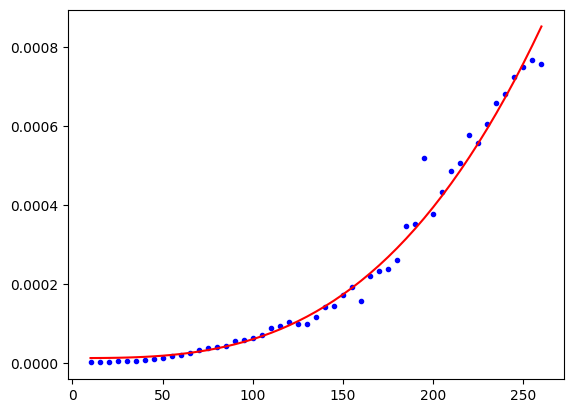

In [ ]:
#check https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html for more information
from scipy.optimize import curve_fit # libreria de calculo cientifico, similar a numpy

def my_f(x, a, b): # x es la dimension, y a y b crean la funcion que queremos que se ajuste a los valores
    #change this appropriately
    return a * x**3. + b
# ejes
x = a_timings_np[ : , 0]    # array de las coordenadas x, en x las dimensiones en y los tiempos (col 0)
y = a_timings_np[ : , 1]    # array cn ls coord de y (col 1 del array a_timings_np)

(a, b), _ = curve_fit(my_f, x, y) # ajustame la funcion con x e y
print('coef a', a, 'coef b',b)
plt.plot(x, y, 'b.', x, my_f(x, a, b), 'r-') # 'b.' tiempo azul, y la linea de la funcion como una 
                                             # linea roja ('r-')